In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train,y_train) , (x_test, y_test)= fashion_mnist.load_data()

In [3]:
#x_train[0] #pixels related to one image

In [4]:
x_train.shape # here 60000 is number of images, each image is of 28 x 28

(60000, 28, 28)

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
y_train.shape

(60000,)

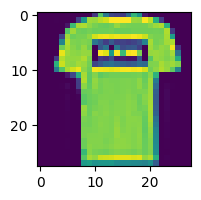

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1]) #just to see how image looks like

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 0, 'T-shirt/top')

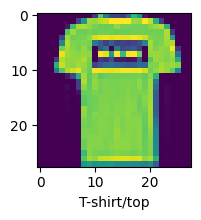

In [9]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])
plt.xlabel(class_names[y_train[1]])

In [10]:

x_train= x_train.reshape(-1,28,28,1) 
x_test= x_test.reshape(-1,28,28,1)

In [11]:

x_train=x_train /255.0
x_test=x_test /255.0

In [12]:
# x_train[1]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

C:\Users\bloss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,906 (550.41 KB)

 Trainable params: 140,522 (548.91 KB)

 Non-trainable params: 384 (1.50 KB)

In [15]:

epochs = 100
batch_size = 512

history = cnn_model.fit(
    x_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(x_test, y_test)
)

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 108s 834ms/step - accuracy: 0.5559 - loss: 1.6638 - val_accuracy: 0.1000 - val_loss: 2.7342
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 96s 812ms/step - accuracy: 0.7988 - loss: 0.5414 - val_accuracy: 0.1008 - val_loss: 3.4234
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 94s 800ms/step - accuracy: 0.8414 - loss: 0.4337 - val_accuracy: 0.3167 - val_loss: 4.1285
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 94s 795ms/step - accuracy: 0.8633 - loss: 0.3714 - val_accuracy: 0.5474 - val_loss: 2.5275
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8759 - loss: 0.3387 - val_accuracy: 0.7371 - val_loss: 0.7986
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8849 - loss: 0.3195 - val_accuracy: 0.8985 - val_loss: 0.2752
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.8910 - loss: 0.2969 - val_accuracy: 0.9053 - val_loss: 0.2609
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8972 - loss: 

In [16]:
# epoch is the number of times an algorithm passes through a training dataset
# batch size is the number of training examples used in one iteration of model training

In [17]:
loss,accuracy=cnn_model.evaluate(x_test,y_test)
print("Accuracy :" ,accuracy*100,"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9377 - loss: 0.2440
Accuracy : 93.80999803543091 %


In [ ]:
# some predictions

In [18]:
y_predict=cnn_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [19]:
y_predict[0]

array([9.3792690e-24, 3.1719371e-23, 3.0350890e-23, 4.3271305e-23,
       7.1557404e-22, 1.1810657e-13, 1.2025449e-24, 4.8140296e-09,
       3.5873546e-25, 1.0000000e+00], dtype=float32)

In [20]:

y_pred=y_predict.argmax(axis=-1)

In [21]:
y_pred[0]

9

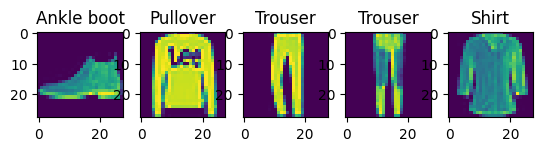

In [22]:
for i in range(5):
    plt.subplot(1,5,i+1) # 1 row and 5 columns
    plt.imshow(x_test[i])
    plt.title(class_names[y_pred[i]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1000
           1       1.00      0.99      0.99      1000
           2       0.93      0.90      0.91      1000
           3       0.94      0.94      0.94      1000
           4       0.88      0.93      0.90      1000
           5       0.99      0.98      0.99      1000
           6       0.80      0.84      0.82      1000
           7       0.96      0.98      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

